In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

# Using pandas to getting some insights into the data

In [2]:
house_data=pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")


In [3]:
house_data

Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0             1  1177.698      2           7        2            2         2   
1             2  2134.800      5           7        4            2         2   
2             3  1138.560      5           7        2            2         1   
3             4  1458.780      2           7        3            2         2   
4             5   967.776     11          14        3            2         2   
..          ...       ...    ...         ...      ...          ...       ...   
640         644  1359.156      7          15        3            2         2   
641         645   377.148      4          10        1            1         1   
642         646   740.064     13          14        1            1         1   
643         647  1707.840      3          14        3            2         2   
644         648  1376.946      6           7        3            2         1   

     Price  
0    62000  
1    78000  
2    58000  
3    45000  
4    45000  
..     ...  
640  45000  
641  24800  
642  45000  
643  65000  
644  36000  

[645 rows x 8 columns]

In [4]:
df=pd.DataFrame(data=house_data)

In [5]:
df=df.drop(df.columns[[0]],axis = 1)

In [6]:
df.head()

Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
0  1177.698      2           7        2            2         2  62000
1  2134.800      5           7        4            2         2  78000
2  1138.560      5           7        2            2         1  58000
3  1458.780      2           7        3            2         2  45000
4   967.776     11          14        3            2         2  45000

In [7]:
df.tail()

Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
640  1359.156      7          15        3            2         2  45000
641   377.148      4          10        1            1         1  24800
642   740.064     13          14        1            1         1  45000
643  1707.840      3          14        3            2         2  65000
644  1376.946      6           7        3            2         1  36000

In [8]:
df.shape

(645, 7)

In [9]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

Renaming the 'Living.Room' column

In [10]:
df.rename(columns={'Living.Room':'LivingRoom'},inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sqft        645 non-null    float64
 1   Floor       645 non-null    int64  
 2   TotalFloor  645 non-null    int64  
 3   Bedroom     645 non-null    int64  
 4   LivingRoom  645 non-null    int64  
 5   Bathroom    645 non-null    int64  
 6   Price       645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [12]:
df.describe()

Sqft       Floor  TotalFloor     Bedroom  LivingRoom  \
count   645.000000  645.000000  645.000000  645.000000  645.000000   
mean   1527.656260    5.939535   10.855814    2.837209    1.813953   
std     767.386531    3.884721    4.996208    1.010740    0.462364   
min     359.358000    1.000000    1.000000    1.000000    0.000000   
25%     925.080000    3.000000    7.000000    2.000000    2.000000   
50%    1423.200000    5.000000   12.000000    3.000000    2.000000   
75%    1892.856000    8.000000   14.000000    4.000000    2.000000   
max    5856.468000   22.000000   38.000000    7.000000    4.000000   

         Bathroom          Price  
count  645.000000     645.000000  
mean     1.810853   61986.823256  
std      0.683574   35635.091007  
min      0.000000    6100.000000  
25%      1.000000   39000.000000  
50%      2.000000   50000.000000  
75%      2.000000   75000.000000  
max      5.000000  250000.000000

In [13]:
df.isnull().sum()

Sqft          0
Floor         0
TotalFloor    0
Bedroom       0
LivingRoom    0
Bathroom      0
Price         0
dtype: int64

# visualization of the data

In [14]:
df_gp=df.groupby(['TotalFloor'],as_index=False)['Price'].mean()

In [ ]:
df_gp

TotalFloor          Price
0            1   12000.000000
1            3   32500.000000
2            4   42086.027778
3            5   38810.000000
4            6   64637.444444
5            7   57687.453416
6            8   45333.333333
7            9   59133.300000
8           10   55100.000000
9           11   56937.437500
10          12   56321.840708
11          13   70068.400000
12          14   59338.161765
13          15   88781.321429
14          16   74683.615385
15          17   70187.500000
16          18   71750.000000
17          19  105058.764706
18          20   55000.000000
19          21   93361.111111
20          24  107750.000000
21          25   91900.000000
22          26   19000.000000
23          27   58500.000000
24          38  225000.000000

<BarContainer object of 25 artists>

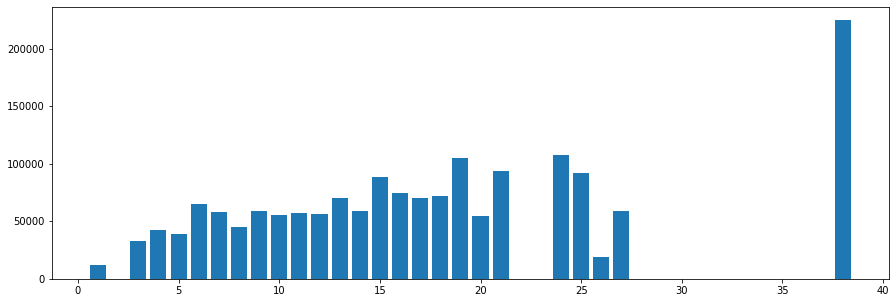

In [15]:
plt.figure(figsize=(15,5))
plt.bar(df_gp['TotalFloor'],df_gp['Price'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 <a list of 73 Text major ticklabel objects>)

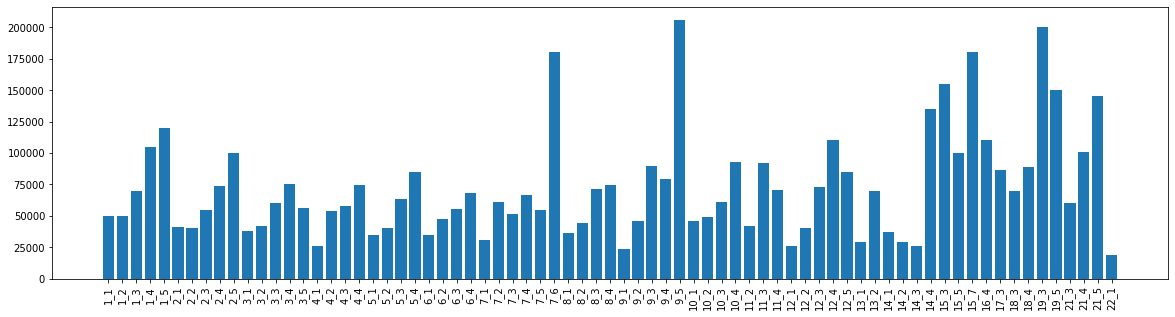

In [16]:
df_gp1=df.groupby(['Floor','Bedroom'],as_index=False)['Price'].mean()
plt.figure(figsize=(20,5))
plt.bar(df_gp1['Floor'].astype(str)+'_'+df_gp1['Bedroom'].astype(str),df_gp1['Price'])
plt.xticks(rotation=90)

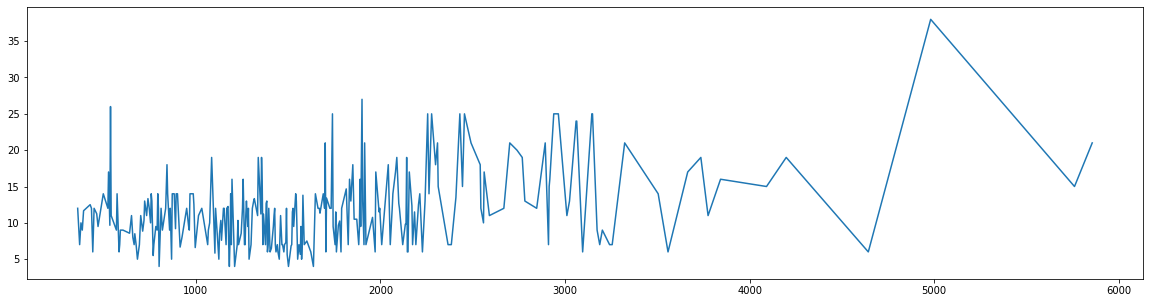

In [17]:
df_gp2=df.groupby(['Sqft'],as_index=False)['TotalFloor'].mean()
plt.figure(figsize=(20,5))
plt.plot(df_gp2['Sqft'],df_gp2['TotalFloor'])

# Managing data for training & testing

In [18]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [19]:
x

Sqft  Floor  TotalFloor  Bedroom  LivingRoom  Bathroom
0    1177.698      2           7        2           2         2
1    2134.800      5           7        4           2         2
2    1138.560      5           7        2           2         1
3    1458.780      2           7        3           2         2
4     967.776     11          14        3           2         2
..        ...    ...         ...      ...         ...       ...
640  1359.156      7          15        3           2         2
641   377.148      4          10        1           1         1
642   740.064     13          14        1           1         1
643  1707.840      3          14        3           2         2
644  1376.946      6           7        3           2         1

[645 rows x 6 columns]

In [20]:
y

0      62000
1      78000
2      58000
3      45000
4      45000
       ...  
640    45000
641    24800
642    45000
643    65000
644    36000
Name: Price, Length: 645, dtype: int64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((580, 6), (65, 6), (580,), (65,))

In [43]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8401197468547605

In [44]:
y_pred=model.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.8401197468547605

In [46]:
regression_accuracy_scores=[]
for i in range(1,10):
  model=KNeighborsRegressor(n_neighbors=i)
  model.fit(x_train,y_train)
  regression_accuracy_scores.append(model.score(x_test,y_test))

In [47]:
max(regression_accuracy_scores)

0.8593268277895185

In [48]:
np.argmax(regression_accuracy_scores)

3

In [49]:
list(range(1,90))[3]

4

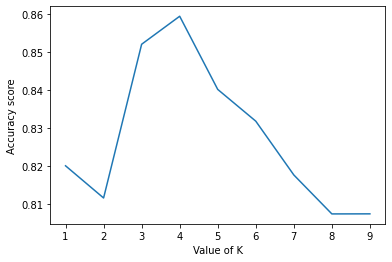

In [50]:
k_range=range(1,10)
plt.plot(k_range,regression_accuracy_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy score')
plt.show()

# Better value of k is 4

In [51]:
optimum_model=KNeighborsRegressor(n_neighbors=4)
optimum_model.fit(x_train,y_train)
y_pred1=optimum_model.predict(x_test)
error=np.sqrt(mean_squared_error(y_test,y_pred1))

In [52]:
error

14724.057871649795